# Week 7: Lattice field theory



Last week we have seen that close to a continuous phase transition the correlation length of a discrete statistical system diverges, like in the Ising model. In this regime the physics of the model takes place on scales that are much larger than the individual lattice sites, so one is approaching physics in the continuum. Except when we are trying to model a realistic lattice, say of a crystalline material, the lattice is usually an artifact of trying to represent continuous physics in the necessarily discrete framework in which a computer can operate. Understanding the **continuum limit** of lattice models in terms of their critical properties is therefore of central importance in many applications of Monte Carlo techniques in physics. This week we will concentrate on applications to **Lattice Field Theory**. This is a huge and very active topic of which we will only be able to scratch the surface. The basic goal is simple: given a Quantum Field Theory (QFT) in the continuum, construct a **lattice discretization** that is amenable to Markov Chain Monte Carlo simulation and such that it possesses a continuum limit that agrees with the original QFT. If successful this procedure is, in principle, of great value to Quantum Field Theory for several reasons:
1. Discretization naturally imposes an **ultraviolet cut-off** on the QFT, meaning that the infinities that necessarily appear in continuum calculations are automatically regularized.
2. Upon discretization the degrees of freedom in the fields are reduced from (uncountably) infinite to only a finite number (one or several values per lattice site). This allows one to do calculations beyond the perturbation theory that is usually employed in the continuum, i.e. lattice discretization provides access to **non-perturbative phenomena** in field theory (like confinement of quarks in quantum chromodynamics). 
3. The **range of observables** that can be computed in Monte Carlo simulations is different from the range that is accessible via continuum methods, because they have different limitations. The latter are limited by the analytical and mathematical methods available to perform the computations, while in computer simulations there is a lot of freedom in measuring quantities and the main limitations stem from having limited statistics/lattice sizes and artifacts of discretization.

This sounds all good, but we will see that there are some serious constraints on the QFT in question and hurdles in selecting appropriate discretizations.

## Path Integrals in Quantum Mechanics

Before diving into field theory, we focus on the quantum mechanics of a single particle. Let us consider a point particle (with mass $m=1$) in a one-dimensional potential $V(x)$ with Hamiltonian
$$H = \frac{1}{2}p^2 + V(x).$$
There are two equivalent ways to construct the quantum mechanics of this system:
1. **Canonical quantization**: promoting the position, momentum and Hamiltonian to operators on a Hilbert space satisfying $[\hat{x},\hat{p}] = i\hbar$.
2. **Path integral quantization**: formally integrating over all possible paths $x(t)$ with a contribution that is proportional to $e^{i S[x(t)] / \hbar}$, where $S[x(t)]$ is the action given by the time integral of the Lagrangian associated to $H$.

Let us have a look at the relation between the two. For this it is most convenient to work in the Heisenberg picture of canonical quantization in which states are time independent and operators $\hat{x}(t)$ evolve with time as
$$\hat{x}(t) = e^{i \hat{H} t/\hbar} \hat{x}(0) e^{-i \hat{H} t/\hbar}.$$
Denoting the eigenstates of $\hat{x}(t)$ by $|x,t\rangle$, i.e. $\hat{x}(t) |x,t\rangle = x |x,t\rangle$, we then also have $|x,t\rangle = e^{i\hat{H}t/\hbar} |x,0\rangle \equiv e^{i\hat{H}t/\hbar} |x\rangle$. The **transition amplitude** for the particle to move from initial position $x_i$ at time $t_i$ to the final position $x_f$ at time $t_f$ is then given by
$$ \langle x_f, t_f | x_i, t_i \rangle = \langle x_f| e^{-i \hat{H} (t_f-t_i)/\hbar}| x_i\rangle.$$
Inserting the identity operator $\int \mathrm{d}x |x,t_j\rangle\langle x,t_j|$ at $N-1$ equally spaced intermediate times we find
$$\begin{align*}\langle x_f, t_f | x_i, t_i \rangle &= \int \mathrm{d}x_1\cdots\mathrm{d}x_{N-1} \prod_{j=1}^{N}\langle x_{j}, t_{j} | x_{j-1}, t_{j-1} \rangle \qquad (t_0 = t_i, t_N = t_f,x_0 = x_i,x_N = x_f) \\
&= \int \mathrm{d}x_1\cdots\mathrm{d}x_{N-1} \prod_{j=1}^{N} \langle x_j | e^{-i \hat{H} \delta / \hbar} | x_{j-1}\rangle,
\end{align*}$$
where $\delta = (t_f-t_i) / N$. We are interested in the $N\to\infty$ limit, so we compute to leading order in $\delta$ that
$$\begin{align*}
\langle x_j | e^{-i \hat{H} \delta / \hbar} | x_{j-1}\rangle &= \langle x_j | e^{-i V(\hat{x})\delta/ \hbar}e^{-i \hat{p}^2 \delta/ (2\hbar)} | x_{j-1}\rangle  + O(\delta^2)\\
&= e^{-i V(x_j)\delta/\hbar} \langle x_j | e^{-i \hat{p}^2 \delta/ (2\hbar)}| x_{j-1}\rangle  + O(\delta^2)\\
&= e^{-i V(x_j)\delta/\hbar} \int \frac{\mathrm{d}p}{2\pi} \langle x_j | e^{-i \hat{p}^2 \delta/ (2\hbar)} |p\rangle\langle p| x_{j-1}\rangle  + O(\delta^2)\qquad(\text{insert identity operator }{\textstyle\int\frac{\mathrm{d}p}{2\pi}|p\rangle\langle p|}\,)\\
&= e^{-i V(x_j)\delta/\hbar} \int \frac{\mathrm{d}p}{2\pi}e^{-i p^2\delta / (2\hbar)} \langle x_j | p\rangle\langle p| x_{j-1}\rangle  + O(\delta^2)\\
&= e^{-i V(x_j)\delta/\hbar} \int \frac{\mathrm{d}p}{2\pi\hbar}e^{-i p^2\delta / (2\hbar) - ip(x_j - x_{j-1})/\hbar}  + O(\delta^2) \qquad (\text{plane wave }\langle p | x\rangle = e^{ipx/\hbar}/\sqrt{\hbar})\\
&= C \exp\left[\frac{i}{\hbar} \delta\left(\frac{1}{2} \left(\frac{x_{j}-x_{j-1}}{\delta}\right)^2 - V(x_j)\right)\right]  + O(\delta^2),
\end{align*}$$
where $C$ is an unimportant constant. Plugging this into the transition amplitude we find
$$\begin{align*}\langle x_f, t_f | x_i, t_i \rangle &= C^N \int \mathrm{d}x_1\cdots\mathrm{d}x_{N-1} \exp\left[ \frac{i}{\hbar} \delta \sum_{j=1}^{N} \left(\frac{1}{2} \left(\frac{x_{j}-x_{j-1}}{\delta}\right)^2 - V(x_j)\right)\right]\\
&\xrightarrow{N\to\infty} \int_{\substack{x(t_i) = x_i\\x(t_f) = x_f}}[\mathcal{D}x(t)]\, e^{\frac{i}{\hbar}S[x(t)]}, \qquad S[x(t)] = \int_{t_i}^{t_f} \mathrm{d}t \,L(x(t),\dot{x}(t)), \qquad L(x,\dot{x}) = \frac{1}{2} \dot{x}^2 - V(x).
\end{align*}$$
Here $S[x(t)]$ is the action obtained by a time-integral of the (classical) Lagrangian $L(x,\dot{x})$, which is related to the (classical) Hamiltonian $H$ by the usual Legendre transform. Note that $[\mathcal{D}x(t)]$ is a formal functional integration measure on the space of all functions $t\to x(t)$ on $[t_i,t_f]$ with the fixed boundary conditions $x(t_i) = x_i$, $x(t_f) = x_f$.

The path-integral formulation has the advantage over canonical quantization, that the variables involved, i.e. the positions $x(t)$ at different times $t$, are regular numbers instead of non-commutative operators. However, we are left with a functional integral that is highly oscillatory and requires a fragile destructive interference of the phases $e^{\frac{i}{\hbar}S}$ to yield a sensible result.

### Correlation functions
The transition amplitude as function of $x_i,x_f$ and $t_i,t_f$ contains all information about the quantum system and is accessible in both frameworks. However, since they play the role as boundary conditions in the path integral, it is not necessarily easy to vary them in practice. Luckily the same information as in the transition amplitude is also available in the collection of **correlation functions** without varying the initial and final state. In canonical quantization a correlation function generally is an expectation value with respect to a fixed state, for instance  the ground state $|0\rangle$ of the Hamiltonian, of an operator constructed from $\hat{x}(t)$ at different times, e.g. the two-point correlation function $\langle 0 | \hat{x}(t_2)\hat{x}(t_1) | 0 \rangle$ for $t_2 > t_1$. Given a complete set of eigenstates $|\phi_n\rangle$ with increasing energies $E_n$, $H |\phi\rangle = E_n |\phi_n\rangle$, this is given by
$$\begin{align*}
\langle 0 | \hat{x}(t_2)\hat{x}(t_1) | 0 \rangle &= \langle 0 | e^{ i H t_2/\hbar} \hat{x}(0) e^{-i H (t_2-t_1)/\hbar} \hat{x}(0) e^{-i H t_1/\hbar}|0 \rangle \\
&= \sum_n \langle 0 | \hat{x}(0) e^{-i H (t_2-t_1)/\hbar} |\phi_n\rangle\langle \phi_n| \hat{x}(0) |0 \rangle \\
&= \sum_n |\langle 0 | \hat{x}(0) | \phi_n\rangle |^2 e^{-i E_n (t_2-t_1)/\hbar}. \tag{1}
\end{align*}$$
So we see for instance that the different energy eigenstates can be extracted from Fourier analysis of this correlation function. Correlation functions are particularly natural objects in the path integral as they are computed by simply "putting the observable in the integrand", e.g.
$$C(t_2,t_1) = \frac{\langle x_f, t_f| \hat{x}(t_2)\hat{x}(t_1) | x_i,t_i \rangle}{\langle x_f, t_f|x_i,t_i \rangle} = \frac{1}{\mathcal{Z}}\int_{\substack{x(t_i) = x_i\\x(t_f) = x_f}}[\mathcal{D}x]\,x(t_2)x(t_1) e^{\frac{i}{\hbar}S[x(t)]}, \qquad \mathcal{Z}:=\int_{\substack{x(t_i) = x_i\\x(t_f) = x_f}}[\mathcal{D}x] e^{\frac{i}{\hbar}S[x(t)]}.$$
Note this is not precisely the same correlation as $\langle 0 | \hat{x}(t_2)\hat{x}(t_1) | 0 \rangle$, but if we wish we could obtain the latter by integrating over the boundary conditions. Point is that being able to computer arbitrary correlation functions gives sufficient information, without the need to change boundary conditions. 



### Wick rotation

The expression for the correlation $C(t_2,t_1)$ in the path integral formulation looks very much like the expectation value of the observable $x(t_2)x(t_1)$ in of a random function $x(t)$ with partition function $\mathcal{Z}$, except that we have a complex phase instead of a real and positive Boltzmann weight. To really be able to make a probabilistic interpretation, we need to somehow make $e^{\frac{i}{\hbar}S[x(t)]}$ real. Equation (1) already gives a hint on how to do this: we should analytically continue the time to become purely imaginary, i.e. set $t=-i\tau$, such that
$\langle 0| \hat{x}(\tau)\hat{x}(0)|0\rangle = \sum_n |\langle 0 | \hat{x}(0) | \phi_n\rangle |^2 e^{-E_n \tau/\hbar}$. This **Wick rotation** can also be done (at least formally) in the path integral,
$$\begin{align*}
S = \int \mathrm{d}t \left(\frac{1}{2} \dot{x}(t)^2 - V(x(t))\right) &\longrightarrow i S_E = i \int \mathrm{d}\tau \left(\frac{1}{2} \dot{x}(\tau)^2 + V(x(\tau))\right),\\
\mathcal{Z} = \int [\mathcal{D}x] e^{\frac{i}{\hbar}S[x(t)]} &\longrightarrow Z = \int [\mathcal{D}x] e^{-\frac{1}{\hbar}S_E[x(\tau)]}.
\end{align*}$$
If you trust this analytic continuation, then we are in a much better place: the integrand $e^{-S_E[x(\tau)]/\hbar}$ is real and positive so we can really interpret the imaginary-time path integral $Z$ as a partition function for random paths $x(\tau)$. What is more, the imaginary-time action $S_E[x(\tau)]$ is bounded from below (if the potential is), so when $\hbar\to 0$ the partition function is peaked at the minimum of the action, which we can interpret as the classical solution of the particle in imaginary time. The action $S_E[x(\tau)]$ will be called the **Euclidean action** for reasons that should become clear later in the field theory context. But why should we trust this operation? Well, under suitable assumptions and boundary conditions, the correlation functions of the real-time and imaginary-time path integrals can be shown to be analytic continuations of each other. This means that if we know one, it can be used to compute the other.

### Example: Simple harmonic oscillator in imaginary time

Let us consider the example of a simple harmonic oscillator with potential $V(x) = \frac{1}{2}\omega^2 x^2$. Instead of choosing initial and final boundary conditions in (imaginary) time, it is convenient to choose the time coordinate $\tau$ to be periodic with some period $T$. We therefore obtain the path integral
$$ Z = \int [\mathcal{D}x(\tau)] e^{-\frac{1}{\hbar}S_E[x(\tau)]}, \qquad S_E[x(\tau)] = \int_0^T \mathrm{d}\tau\left(\frac{1}{2} \dot{x}(\tau)^2 + \frac{1}{2}\omega^2 x(\tau)^2\right), \qquad x(T)=x(0).$$
Its two-point correlation function can be related to the canonical quantization via
$$\langle x(s)x(0) \rangle := \frac{1}{Z} \int [\mathcal{D}x(\tau)] x(s)x(0) e^{-\frac{1}{\hbar}S_E[x(\tau)]} = \frac{\mathrm{Tr}[ \hat{x}(s)\hat{x}(0) e^{-T H/\hbar}]}{\mathrm{Tr}[e^{-T H/\hbar}]} = \frac{\sum_n \langle \phi_n |\hat{x}(s)\hat{x}(0)|\phi_n\rangle e^{-T E_n/\hbar}}{\sum_n e^{-T E_n/\hbar}}.$$
If $T (E_1-E_0)/\hbar \gg 1$ and $s \ll T$ then the left-hand side is proportional to $e^{-(E_1-E_0)s}$, so the two-point function $\langle x(s)x(0) \rangle$ should show an exponential decay for small $s$ with rate given by the excitation energy of the simple harmonic oscillator.

In order to simulate this partition function, we need to perform a **lattice discretization**, in a way that is essentially the reverse of what we did above when relating the canonical to path-integral quantization. We only record the position $x_1, x_2,\ldots, x_N = x_0$ on the $N$ sites of a one-dimensional lattice in the time direction and choose a **lattice action** in which the time derivatives are replaced by discrete counterparts,
$$S_E[x] \approx a \sum_{j=1}^{N} \left(\frac{1}{2} \left(\frac{x_{j}-x_{j-1}}{a}\right)^2 + \frac{\omega^2}{2}x_j^2\right),$$
where $a = T / N$ is the **lattice spacing**. We then introduce **dimensionless** parameters $\hat{x}_i = x_i / a$,  $\hat{\omega}=\omega a$, $\beta = a/\hbar$. Leading to the Boltzmann distribution in terms of a dimensionless action
$$\pi(\hat{x}) = \frac{1}{Z} e^{-\beta S_L}, \qquad S_L[\hat{x}] = \frac{1}{2} \sum_{j=1}^N \left(\left(\hat{x}_{j}-\hat{x}_{j-1}\right)^2 + \hat{\omega}^2 \hat{x}_j^2\right).$$
This is our desired distribution, in which the analogy with a statistical partition function has been made explicit through the introduction of a fiducial inverse temperature $\beta = a/\hbar$. Now we are in business, because we know how to sample from this distribution using **Metropolis-Hastings**!

Note that in this case $\beta$ does not play any role, as it can be absorbed in a rescaling $\hat{x}_j \to \hat{x}'_j=\hat{x}_j \sqrt{\beta}$, so we can safely set $\beta = 1$. As proposal transition we select a uniform site $t$ and take $\hat{y}_t = \hat{x}_t + U$ and $\hat{y}_j = \hat{x}_j$ for $j\neq t$, where $U$ is uniform on $(-\delta,\delta)$. The result is then accepted with probability 

$$A(\hat{x} \to \hat{y}) = \min(1,e^{-\Delta S}), \qquad \Delta S= S_L[\hat{y}]-S_L[\hat{x}] = (\hat{x}_{t-1}+\hat{x}_{t+1})(\hat{x}_t-\hat{y}_t) + (1+\tfrac12 \hat{\omega}^2)(\hat{y}_t^2-\hat{x}_t^2).$$

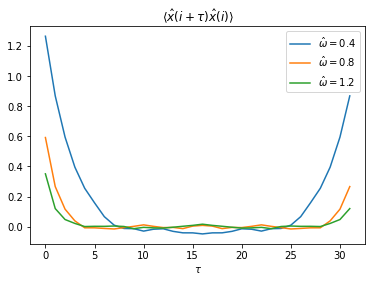

In [1]:
import numpy as np
rng = np.random.default_rng()  
import matplotlib.pylab as plt
%matplotlib inline

def lattice_action(x,omega_sq):
    '''Compute lattice action S_L[x] on state x.'''
    return 0.5 * ( np.dot(x - np.roll(x,1),x-np.roll(x,1)) + omega_sq*np.dot(x,x) )

def lattice_action_diff(x,t,newx,omega_sq):
    '''Compute change in action when x[t] is replaced by newx.'''
    w = len(x)
    return (x[(t-1)%w]+x[(t+1)%w])*(x[t]-newx) + (1+0.5*omega_sq)*(newx*newx - x[t]*x[t]) 

def oscillator_MH_step(x,omega_sq,delta):
    '''Perform Metropolis-Hastings update on uniform site with range delta.'''
    t = rng.integers(0,len(x))
    newx = x[t] + rng.uniform(-delta,delta)
    deltaS = lattice_action_diff(x,t,newx,omega_sq)
    if deltaS < 0 or rng.uniform() < np.exp(-deltaS):
        x[t] = newx
        return True
    return False

def run_oscillator_MH(x,omega_sq,delta,n):
    '''Perform n Metropolis-Hastings moves on state x.'''
    total_accept = 0
    for _ in range(n):
        if oscillator_MH_step(x,omega_sq,delta):
            total_accept += 1
    return total_accept

def two_point_function(states):
    '''Estimate two-point correlation <x(s+t)x(s)> from states (averaging over s).'''
    return np.array([np.mean(states * np.roll(states,t,axis=1)) for t in range(len(states[0]))])

time_length = 32
omegas = [0.4,0.8,1.2]
delta = 1.8  # chosen to have ~ 50% acceptance
equil_sweeps = 1000
measure_sweeps = 10
measurements = 100

two_point_funs = []
for omega in omegas:
    omega_sq = omega**2
    x_state = np.zeros(time_length)
    run_oscillator_MH(x_state,omega_sq,delta,equil_sweeps * time_length)
    states = np.empty((measurements,time_length))
    for s in states:
        run_oscillator_MH(x_state,omega_sq,delta,measure_sweeps * time_length)
        s[:] = x_state
    two_point_funs.append(two_point_function(states))

plt.plot(np.transpose(np.array(two_point_funs)))
plt.legend([r"$\hat\omega = {}$".format(o) for o in omegas])
plt.title(r"$\langle \hat{x}(i + \tau)\hat{x}(i)\rangle$")
plt.xlabel(r"$\tau$")
plt.show()

Indeed we observe an exponential decay $\langle x(s)x(0)\rangle \sim e^{-(E_1-E_0)s}$ for small $s$, so by fitting we could estimate the excitation energy from the data. Note that the continuum limit should be sought when $N\to\infty$, i.e. the lattice spacing $a = T/N \to 0$ and $\hat{\omega} = \omega a \to 0$. This is in accordance with our claim last week that we should approach criticality, in this case $\hat{\omega} \to 0$, where the dimensionless correlation length diverges.

### Heatbath algorithm

Let us take the opportunity to discuss an alternative to (or rather a special case of) the Metropolis-Hastings algorithm that sometimes works better. Like in the Metropolis-Hastings algorithm we described above only a single site is updated, but in the **heatbath algorithm** this is done in a rejection-free fashion by locally thermalizing a randomly chosen site within its neighborhood. In other words, we select a uniform site $t$ and sample a new value $\hat{y}_t$ with density proportional to $\pi(\hat{x}_1,\ldots,\hat{x}_{t-1},\hat{y}_t,\hat{x}_{t+1},\ldots,\hat{x}_N)$. The other values are left unchanged, i.e. $\hat{y}_i=\hat{x}_i$, $i\neq t$. It is easily checked that the resulting transition density $p(\hat{x},\hat{y})$ satisfies detailed balance and is irreducible. 

In the case of the harmonic oscillator we should thus sample $\hat{y}_t$ with density proportional to 
$$ \exp\left[(\hat{x}_{t-1}+\hat{x}_{t+1})\hat{y}_t - (1+\tfrac12 \hat{\omega}^2)\hat{y}_t^2\right],$$
but this is nothing but a normal random variable with mean $\mu$ and variance $\sigma^2$ given by
$$ \mu = \frac{\hat{x}_{t-1}+\hat{x}_{t+1}}{2 + \hat{\omega}^2}, \qquad \sigma^2 = \frac{1}{2+\hat{\omega}^2}.$$
Let us check that this algorithm yields the same result as before.

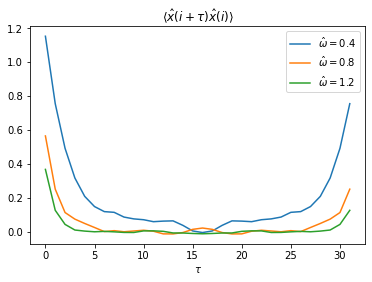

In [57]:
def oscillator_heatbath_step(x,sigma):
    '''Perform heatbath update on state x.'''
    w = len(x)
    t = rng.integers(0,w)
    x[t] = rng.normal(sigma*sigma*(x[(t-1)%w] + x[(t+1)%w]),sigma)

def run_oscillator_heatbath(x,omega_sq,n):
    '''Perform n heatbath updates.'''
    sigma = 1/np.sqrt(2+omega_sq)
    for _ in range(n):
        oscillator_heatbath_step(x,sigma)

two_point_funs = []
for omega in omegas:
    omega_sq = omega**2
    x_state = np.zeros(time_length)
    run_oscillator_heatbath(x_state,omega_sq,equil_sweeps * time_length)
    states = np.empty((measurements,time_length))
    for s in states:
        run_oscillator_heatbath(x_state,omega_sq,measure_sweeps * time_length)
        s[:] = x_state
    two_point_funs.append(two_point_function(states))

plt.plot(np.transpose(np.array(two_point_funs)))
plt.legend([r"$\hat\omega = {}$".format(o) for o in omegas])
plt.title(r"$\langle \hat{x}(i + \tau)\hat{x}(i)\rangle$")
plt.xlabel(r"$\tau$")
plt.show()        
    

## Scalar field theory

The step from the path integral of a quantum mechanical particle to the path integral of a scalar field theory is a small one. Recall that the former amounts to an integration over all trajectories $x(\tau)$ in imaginary time $\tau$. We can really interpret $x(\tau)$ as a scalar field in $0$ spatial and $1$ temporal direction. So the only thing we need to do is to make the field $\phi(x)$ depend on extra spatial dimensions and replace the action by the appropriate action of the field theory we are interested in. 

Let us concentrate on the case of a real scalar field $\phi(x^\mu)$ on 4-dimensional Minkowski space with mass $m_0$ and quartic self-coupling $\lambda_0$. The corresponding action is
$$S[\phi] = \int \mathrm{d}^4x\left[\frac{1}{2} \eta^{\mu\nu}\partial_\mu \phi\partial_\nu \phi - \frac{1}{2}m_0^2 \phi^2 - \frac{1}{4!}\lambda_0 \phi^4\right] = \int \mathrm{d}t \mathrm{d}^3 x \left[\frac{1}{2} (\partial_t \phi)^2 - \frac{1}{2}\delta^{ij}\partial_i \phi\partial_j \phi - \frac{1}{2}m_0^2 \phi^2 - \frac{1}{4!}\lambda_0 \phi^4\right].$$
As in the quantum-mechanical example, we need to perform a **Wick rotation** to imaginary time $t = -i\tau$, replacing the phase $e^{\frac{i}{\hbar}S}$ by the real weight $e^{-\frac{1}{\hbar}S_E}$, where
$$ S_E[\phi] = \int \mathrm{d}\tau \mathrm{d}^3 x \left[\frac{1}{2} (\partial_\tau \phi)^2 + \frac{1}{2}\delta^{ij}\partial_i \phi\partial_j \phi + \frac{1}{2}m_0^2 \phi^2 + \frac{1}{4!}\lambda_0 \phi^4\right] = \int \mathrm{d}^4 x \left[\frac{1}{2}\delta^{\mu\nu}\partial_\mu \phi\partial_\nu \phi + \frac{1}{2}m_0^2 \phi^2 + \frac{1}{4!}\lambda_0 \phi^4\right].$$
It is called the **Euclidean action**, because it has exactly the form of a scalar field in 4-dimensional Euclidean space with metric $\delta_{\mu\nu}$. Note that it is bounded below if $\lambda_0 > 0$, so we can be optimistic about assigning a probabilistic interpretation to $e^{-\frac{1}{\hbar}S_E}$.

But does any physical interpretation remain after this Wick rotation? It turns out that under certain conditions, the correlation functions in real time (known as **Wightman distributions**) and imaginary time (known as **Schwinger functions**) are analytic continuations of each other, just like in the quantum-mechanical case above. On the Euclidean field theory side the conditions are know as the [Osterwalder-Schrader axioms](https://en.wikipedia.org/wiki/Schwinger_function), including the important property of **reflection positivity**. Once this is known, the correlation functions of the Euclidean field theory provide access to the spectrum of the real-time Hamiltonian, from which masses of particles can for instance be extracted.

To turn our Euclidean scalar field theory into a lattice field theory, we select a lattice spacing $a$ and put the scalar field on a $w\times w\times w\times w$ grid $\Lambda = \{a,2a,\ldots,wa\}^4$ with periodic boundary conditions and select a discretized action, e.g.
$$ S_L[\phi] = a^4 \sum_{x\in\Lambda}\left[ \frac{1}{2}m_0^2 \phi^2(x) + \frac{1}{4!}\lambda_0 \phi^4(x) + \sum_{\hat{\mu}}\frac{1}{2}\left(\frac{\phi(x+\hat{\mu} a)-\phi(x)}{a}\right)^2\right],$$
where the second sum is over the 4 directions $\hat{\mu} = (1,0,0,0), \ldots, (0,0,0,1)$. 
We can make the couplings and fields dimensionless via the identifications
$$ \phi(ax) = \frac{\sqrt{2\kappa}}{a}\varphi(x), \quad a^2 m_0^2 = \frac{1-2\lambda}{\kappa}-8, \quad \lambda_0 = \frac{6\lambda}{\kappa^2}.$$
Up to an irrelevant constant shift by $\lambda w^4$ this leads to the standard form
$$S_L[\varphi] = \sum_{x\in\Lambda}\left[ V(\varphi(x)) - 2\kappa \sum_{\hat{\mu}}\varphi(x)\varphi(x+\hat{\mu})\right],\qquad V(\varphi) = \lambda (\varphi^2-1)^2+\varphi^2.$$
The advantage of this form is that we can easily understand the $\lambda \to \infty$ limit of the lattice field theory. In this limit the potential $V(\varphi)$ will confine $\varphi(x)$ to take values $\pm 1$, turning the model exactly into the Ising model on the grid with parameter $\beta J = \kappa$. It is thus reasonable to expect that this interacting scalar field theory lives in the same **universality class** as the 4d Ising model, in the sense that it possesses the same continuum limit at criticality. 

Let us have a look at the field average $m = w^{-4}\sum_{x\in\Lambda} \varphi(x)$, which is the analogue of the magnetization per spin in the Ising model. The following code measures the absolute field average $|m|$ for $\lambda = 1.5$ and $w=3$ and several values of $\kappa$ using Metropolis-Hastings. Needless to say, this is a tiny lattice and the statistics are pretty bad. Optimization and patience are required to handle larger lattices, but the spontaneous symmetry-breaking transition is already clearly visible.

kappa = 0.08, |m| = 0.117 +- 0.004
kappa = 0.09, |m| = 0.137 +- 0.006
kappa = 0.10, |m| = 0.172 +- 0.010
kappa = 0.11, |m| = 0.209 +- 0.019
kappa = 0.12, |m| = 0.284 +- 0.026
kappa = 0.13, |m| = 0.401 +- 0.037
kappa = 0.14, |m| = 0.605 +- 0.015
kappa = 0.15, |m| = 0.718 +- 0.012
kappa = 0.16, |m| = 0.781 +- 0.006
kappa = 0.17, |m| = 0.852 +- 0.005
kappa = 0.18, |m| = 0.891 +- 0.004


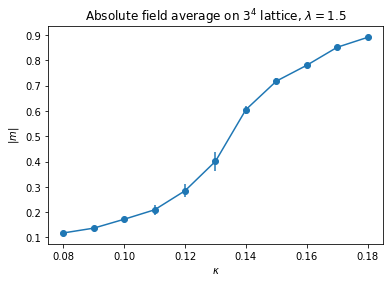

In [2]:
def potential_v(x,lamb):
    '''Compute the potential function V(x).'''
    return lamb*(x*x-1)*(x*x-1)+x*x

def neighbor_sum(phi,s):
    '''Compute the sum of the state phi on all 8 neighbors of the site s.'''
    w = len(phi)
    return (phi[(s[0]+1)%w,s[1],s[2],s[3]] + phi[(s[0]-1)%w,s[1],s[2],s[3]] +
            phi[s[1],(s[1]+1)%w,s[2],s[3]] + phi[s[1],(s[1]-1)%w,s[2],s[3]] +
            phi[s[0],s[1],(s[2]+1)%w,s[3]] + phi[s[0],s[1],(s[2]-1)%w,s[3]] +
            phi[s[0],s[1],s[2],(s[3]+1)%w] + phi[s[0],s[1],s[2],(s[3]-1)%w] )

def scalar_action_diff(phi,site,newphi,lamb,kappa):
    '''Compute the change in the action when phi[site] is changed to newphi.'''
    return (2 * kappa * neighbor_sum(phi,site) * (phi[site] - newphi) +
            potential_v(newphi,lamb) - potential_v(phi[site],lamb) )

def scalar_MH_step(phi,lamb,kappa,delta):
    '''Perform Metropolis-Hastings update on state phi with range delta.'''
    site = tuple(rng.integers(0,len(phi),4))
    newphi = phi[site] + rng.uniform(-delta,delta)
    deltaS = scalar_action_diff(phi,site,newphi,lamb,kappa)
    if deltaS < 0 or rng.uniform() < np.exp(-deltaS):
        phi[site] = newphi
        return True
    return False

def run_scalar_MH(phi,lamb,kappa,delta,n):
    '''Perform n Metropolis-Hastings updates on state phi and return number of accepted transtions.'''
    total_accept = 0
    for _ in range(n):
        total_accept += scalar_MH_step(phi,lamb,kappa,delta)
    return total_accept

def batch_estimate(data,observable,num_batches):
    '''Determine estimate of observable on the data and its error using batching.'''
    batch_size = len(data)//num_batches
    values = [observable(data[i*batch_size:(i+1)*batch_size]) for i in range(num_batches)]
    return np.mean(values), np.std(values)/np.sqrt(num_batches-1)

lamb = 1.5
kappas = np.linspace(0.08,0.18,11)
width = 3
num_sites = width**4
delta = 1.5  # chosen to have ~ 50% acceptance
equil_sweeps = 800
measure_sweeps = 2
measurements = 1000

mean_magn = []
for kappa in kappas:
    phi_state = np.zeros((width,width,width,width))
    run_scalar_MH(phi_state,lamb,kappa,delta,equil_sweeps * num_sites)
    magnetizations = np.empty(measurements)
    for i in range(measurements):
        run_scalar_MH(phi_state,lamb,kappa,delta,measure_sweeps * num_sites)
        magnetizations[i] = np.mean(phi_state)
    mean, err = batch_estimate(np.abs(magnetizations),lambda x:np.mean(x),10)
    mean_magn.append([mean,err])
    print("kappa = {:.2f}, |m| = {:.3f} +- {:.3f}".format(kappa,mean,err))
    
plt.errorbar(kappas,[m[0] for m in mean_magn],yerr=[m[1] for m in mean_magn],fmt='-o')
plt.xlabel(r"$\kappa$")
plt.ylabel(r"$|m|$")
plt.title(r"Absolute field average on $3^4$ lattice, $\lambda = 1.5$")
plt.show()

### Further reading

A thorough text book on Lattice Field Theory including an explanation on path integral approach (Chapter 2) and scalar field (Chapter 3) is: Rothe, Heinz J. [Lattice gauge theories: an introduction](https://library.oapen.org/handle/20.500.12657/50492). World Scientific Publishing Company, 2012.  

For a shorter introduction see Chapter 6 of Joseph, A. (2019). [Markov Chain Monte Carlo Methods in Quantum Field Theories: A Modern Primer](https://arxiv.org/pdf/1912.10997.pdf). arXiv:1912.10997. 